# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

###Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

###Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:
1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

###Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing pag

## Import all the necessary libraries

In [ ]:
import scipy
# scipy.__version__
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/DSBA Notebooks/U2/Project 2/abtest.csv')
df = data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The "group" and "landing page columns mirror each other, as is described in the problem statement. Therefore, it is redundant to analyse both, and I will only focus on "landing page" for the sake of readability ("new" and "old, rather than "treatment" and "control").

In [ ]:
df.shape

(100, 6)

In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no null or missing values.

In [ ]:
df.duplicated().sum()

0

There are no duplicated values.

In [ ]:
df.drop(['group', 'user_id'], axis=1, inplace=True)
df.head()

,landing_page,time_spent_on_the_page,converted,language_preferred
0,old,3.48,no,Spanish
1,new,7.13,yes,English
2,new,4.40,no,Spanish
3,old,3.02,no,French
4,new,4.75,yes,Spanish


Trimming the dataset down to necessary columns by removing redundant "group" and unique "user_id" columns.

In [ ]:
df.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


There is only one numerical column in the dataset, "time_spent_on_the_page". The overall average time spent on the page was approximately 5.4 minutes, with the minimum amount of time being barely over 10 seconds and the maximum amount of time being nearly 11 minutes.

### Univariate Analysis

In [ ]:
''' WHAT TO ANALYZE:
(CAT) userid - no because unique & arbitrary
(CAT) group/landing_page - no bc assigned & explained & similar values for each, yes if checking for validity
(NUM) time_spent_on_the_page - yes
(CAT) converted - yes
(CAT) language_preferred - yes
'''
cat_cols = ['landing_page', 'converted', 'language_preferred']

for col in cat_cols:
    print(df[col].value_counts())
    print("-"*50)

old    50
new    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


50 old and 50 new in "landing_page" verifies that the groups were separated as prescribed in the problem statement. There were slightly more converted users than not, and the language groups are pretty well split evenly, besides English being at 32 users.

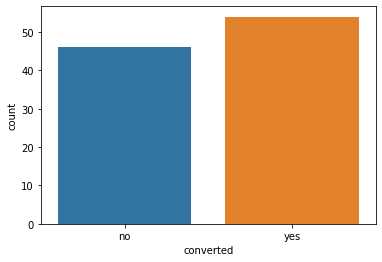

In [ ]:
sns.countplot(data=df, x='converted');

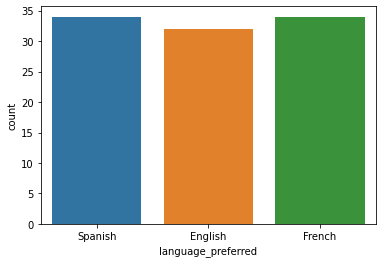

In [ ]:
sns.countplot(data=df, x='language_preferred');

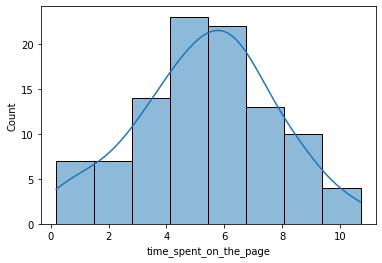

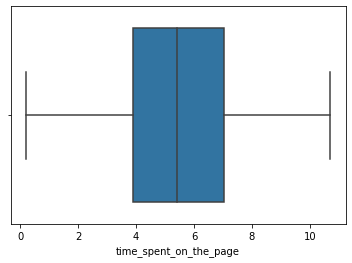

In [ ]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True)
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

### Bivariate Analysis

#####Landing Page comparisons
* time
* converted
* language

#####Converted comparisons
* time
* language

#####Language comparisons
* time

No heat map will be used for this analysis, as there is only one numerical column.

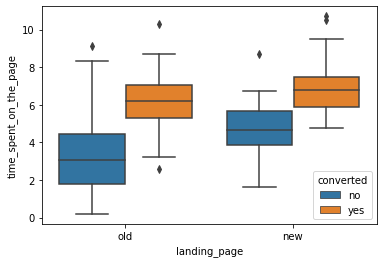

In [ ]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted');

Overview of conversion amounts by landing page, compared to time spent on the page. We can already see that the new landing page is generally performing better than the existing page - the mean conversions for the new page is slightly higher, the mean amounts of time spent on the new page are higher, and there is less of a spread in non-conversions on the new page. I will look further into the data to verify this.

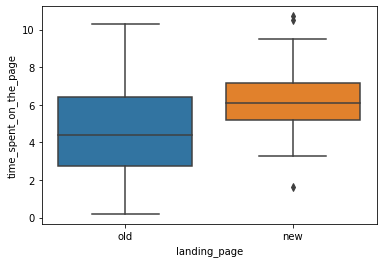

landing_page,new,old
count,50.000000,50.000000
mean,6.223200,4.532400
std,1.817031,2.581975
min,1.650000,0.190000
25%,5.175000,2.720000
50%,6.105000,4.380000
75%,7.160000,6.442500
max,10.710000,10.300000


In [ ]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()
df.groupby('landing_page')['time_spent_on_the_page'].describe().T

From the graph, it looks like more time overall is spent on the new page than the existing one. This statistical summary verifies this, with the old page at a mean of 4.5 minutes, and the new page at a mean of 6.2 minutes.

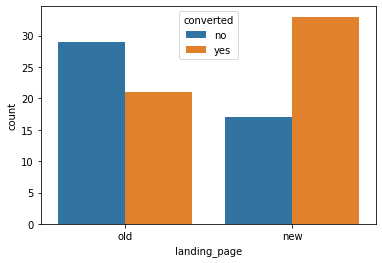

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted');

There is strikingly more users being converted on the new page, and the new page has more conversions than non-conversions, unlike the existing page.

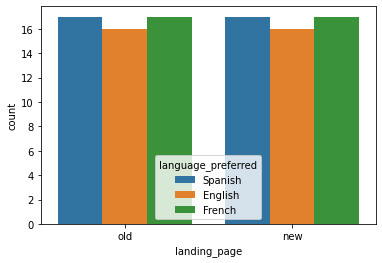

In [ ]:
sns.countplot(data=df, x='landing_page', hue='language_preferred');

Out of curiosity, I checked the amounts of users based on language across the pages, just to verify that they're equal and will not skew the data unintentionally.

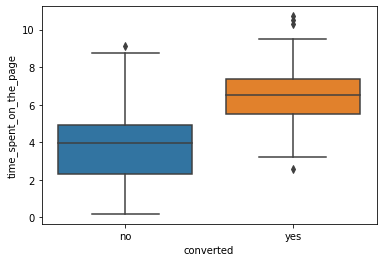

converted,no,yes
count,46.000000,54.000000
mean,3.915870,6.623148
std,2.226897,1.708427
min,0.190000,2.580000
25%,2.337500,5.500000
50%,3.980000,6.495000
75%,4.922500,7.367500
max,9.150000,10.710000


In [ ]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()
df.groupby('converted')['time_spent_on_the_page'].describe().T

Overall, it does appear that users who converted did spend more time on their page, on average, than those who spent less time.

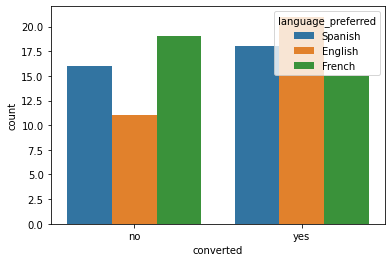

In [ ]:
sns.countplot(data=df, x='converted', hue='language_preferred');

I doubt that the language preferred by the user would correspond to conversions, but sometimes website functionality and UI/UX is not translated (pun intended) across languages. Here, I would check the website to ensure that everything stays formatted correctly across all languages, in case it is the design of the page, rather than the language, that causes any skew in data.

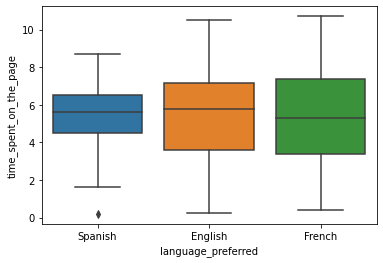

language_preferred,English,French,Spanish
count,32.000000,34.000000,34.000000
mean,5.559062,5.253235,5.331765
std,2.621079,2.675413,1.818095
min,0.220000,0.400000,0.190000
25%,3.617500,3.395000,4.475000
50%,5.755000,5.315000,5.605000
75%,7.137500,7.367500,6.515000
max,10.500000,10.710000,8.720000


In [ ]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()
df.groupby('language_preferred')['time_spent_on_the_page'].describe().T

On average, the amount of time spent on the page across languages is pretty even, but Spanish has the lowest maximum time spent, in comparison to English and French. It also only has an outlier as low as the minimums of English and French.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

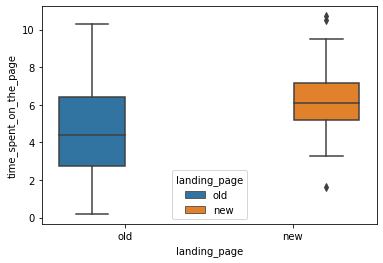

In [ ]:
df.groupby("landing_page")["time_spent_on_the_page"].mean()
sns.boxplot(data=df, x="landing_page", y="time_spent_on_the_page")
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean amounts of time spent on the new landing page and the existing landing page, respectively.
I will test the null hypothesis
>$H_0: \mu_1 \le \mu_2$

against the alternate hypothesis
>$H_a:\mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a **two-sample** problem where the new and existing landing page populations are **independent**. Further, this is a one-tailed hypothesis problem about population means.

Are the T-test assumptions satisfied?
* Continuous data? Yes
* Normally distributed? Assumed to be
* Independent populations? Yes
* Random sampling? Yes
* Equal population standard deviations? ...


In [ ]:
round(df.groupby("landing_page")["time_spent_on_the_page"].std(),2)

landing_page
new    1.82
old    2.58
Name: time_spent_on_the_page, dtype: float64

The sample standard deviations are unequal, so the population standard deviations can be assumed to be unequal. However, this still qualifies for the t-test.

### Step 3: Decide the significance level

The objective states to perform the analysis at a significance level of 5%.

### Step 4: Collect and prepare data

In [ ]:
# Creating new series only containing the time spent for old and new landing page
new_times = df.loc[df['landing_page'] == 'new', 'time_spent_on_the_page']
new_times.reset_index(drop=True, inplace=True)
new_times

old_times = df.loc[df['landing_page'] == 'old', 'time_spent_on_the_page']
old_times.reset_index(drop=True, inplace=True)
old_times

# Creating new dataframe for the times series
times_df = pd.DataFrame({'New LP':new_times, 'Old LP':old_times})

# Checking that new dataframe populated correctly
print(times_df.head())

# new_times = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# old_times = df[df['landing_page'] == ''old]['time_spent_on_the_page']

   New LP  Old LP
0    7.13    3.48
1    4.40    3.02
2    4.75    5.28
3    5.25    6.53
4   10.71    2.08


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(times_df['New LP'], times_df['Old LP'], equal_var=False, alternative='greater')
print("P-value: ", p_value)

P-value:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
p_value < 0.05

True

The p-value (~0.0001) is less than the level of significance (0.05).

### Step 7:  Draw inference

Because the p-value is less than the level of significance, I can reject the null hypothesis. Therefore, I do have enough evidence to support the claim that users spend more time on the new landing page than on the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

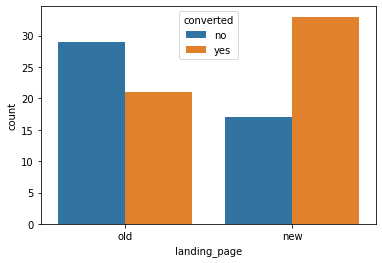

landing_page  converted
new           yes          0.66
              no           0.34
old           no           0.58
              yes          0.42
Name: converted, dtype: float64

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()
df.groupby('landing_page')['converted'].value_counts(normalize=True)

# pd.crosstab(df['converted'], df['landing_page'], normalize='index').plot(kind='bar', stacked=True)
# plt.legend()
# plt.show()

Let $\mu_1, \mu_2$ be the proportions of conversions on the new landing page and the existing landing page, respectively.
I will test the null hypothesis
>$H_0: \mu_1 \le \mu_2$

against the alternate hypothesis
>$H_a:\mu_1 > \mu_2$

This is a **two-sample** problem where the new and existing landing page populations are **independent**. Further, this is a one-tailed hypothesis problem about population means.

Are the Z-test assumptions satisfied?
* Binomially distributed data? Yes
* Random sampling? Yes
* Can binomial distribution be approximated to normal distribution (check that np and n(1-p) are ≥ 10)?

In [ ]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $



For binary data, CLT works slower than usual. After checking that CLT can be applied, I can assume that the binomial distribution can be approximated to normal distribution. Therefore, I will use the 2-proportions z-test.

The objective states to perform the analysis at a significance level of 5%.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

defects = np.array([33, 21])
nobs = np.array([50, 50])
test_stat, p_value = proportions_ztest(defects, nobs)
print('The p-value is ' + str(p_value))

# new_converted = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
# old_converted = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

# n_old = df['landing_page'].value_counts()['old']
# n_new = df['landing_page'].value_counts()['new']

# test_stat, p_value = proportions_ztest([new_converted, old_converted], [n_new, n_old], alternative = 'larger')

# "Monogram of Estimation and Hypothesis Testing"

The p-value is 0.016052616408112556


In [ ]:
p_value < 0.05

True

The p-value (~0.01) is less than the level of significance (0.05).

Because the p-value is less than the level of significance, we can reject the null hypothesis. Therefore, we do have enough evidence to support the claim that the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Are the conversion and preferred language independent or related?

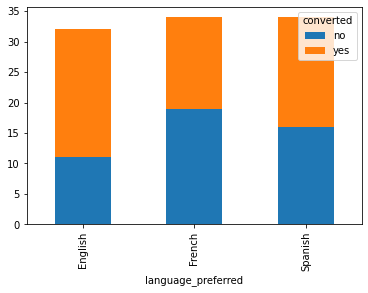

In [ ]:
pd.crosstab(df['language_preferred'], df['converted']).plot(kind='bar', stacked=True);

#swap converted & language, normalize='index'

Let $\mu_1, \mu_2$ be the proportions of conversions on the new landing page and the existing landing page, respectively.
I will test the null hypothesis
>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis
>$H_a:$ Conversion is not independent of preferred language.

Testing chi-square assumptions:
* Categorical variables? Yes
* Expected value of the number of sample observations in each level of the variable is at least 5? Yes
* Random sampling? Yes

I will perform a chi-square test for independence using a significance level of 5%.

In [ ]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is ' + str(p_value))

p_value < 0.05

The p-value is 0.2129888748754345


False

The p-value (~0.21) is greater than the level of significance (0.05).

Because the p-value is greater than the level of significance, we cannot reject the null hypothesis. Therefore, we do not have enough evidence to support the claim that conversion and preferred language are dependent.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
# Separating new landing page dataset from old
new_lp = df.loc[df['landing_page'] == 'new']
new_lp

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [ ]:
new_lp['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [ ]:
new_lp.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

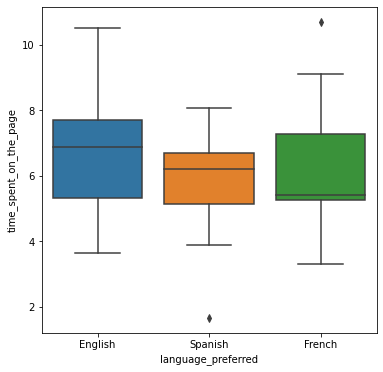

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(data=new_lp, x='language_preferred', y='time_spent_on_the_page')
plt.show()

Let $\mu_1, \mu_2, \mu_3$ be the proportions of conversions on the new landing page and the existing landing page, respectively.
I will test the null hypothesis
>$H_0:$ $\mu_1 = \mu_2 = \mu_3$

against the alternate hypothesis
>$H_a:$ The time spent on the new landing page is different for at least one language group.

Testing ANOVA assumptions:
* Populations are normally distributed? Yes, confirmed by Shapiro-Wilk's Test
* Population variances are equal? Yes, confirmed by Levene's Test
* Samples are independent simple random samples? Yes, given


###Shapiro-Wilk's Test for first assumption

I will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [ ]:
w, p_value = stats.shapiro(new_lp['time_spent_on_the_page'])
print('The p_value is ', p_value)

The p_value is  0.8040016293525696


The p-value is larger than the level of significance, so I fail to reject the null hypothesis, which means the response follows a normal distribution.

###Levene's Test for second assumption

I will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene
statistic, p_value = levene(new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'Spanish'],
                            new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'English'],
                            new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'French'])
print('The p-value is ', p_value)

The p-value is  0.46711357711340173


The p-value is larger than the level of significance, so I fail to reject the null hypothesis, which means the populations variances can be treated as equal.

###Now, to perform the ANOVA test...

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'Spanish'],
                            new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'English'],
                            new_lp['time_spent_on_the_page'][new_lp['language_preferred'] == 'French'])
print('The p-value is ', p_value)
p_value < 0.05

The p-value is  0.43204138694325955


False

The p-value (~0.43) is larger than the level of significance (0.05). Therefore, I fail to reject the null hypothesis, which means I do not have enough evidence to say the time spent on the new landing page is different for at least one language group.

## Conclusion and Business Recommendations

* Users do spend more time on the new landing page.
* The conversion rate for the new landing page is greater than the conversion rate of the existing landing page.
* Conversion and the users' preferred language do not depend on each other.
* The amount of time spent on the new landing page is not different between language groups.

The data collected would highly suggest that deploying the new landing page will promote conversion and time spent on the page, which would help with the proliferation of the business to users visiting the page.

___